 <font color='#008080'> <font face="roboto" size="6"> **CERVICAL CANCER CORRELATION & MODELLING**

---

#<font color='#008080'> <font face="roboto" size="4"> **IMPORTING LIBRARIES**

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#<font color='#008080'> <font face="roboto" size="4"> **DATA EXTRACTION**

In [ ]:
# Reading the contents in the datasets
df1 = pd.read_csv('cervical.csv')
df2 = pd.read_csv('cervical_cancer.csv')
df1.head()


,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,STDs,STDs..number.,STDs..Number.of.diagnosis,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis,Biopsy
0,18,4,15,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
1,15,1,14,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
2,34,1,15,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
3,52,5,16,4,1,37.0,1,3.0,0,0.0,0,0,0,1,1,Healthy
4,46,3,21,4,0,0.0,1,15.0,0,0.0,0,0,0,1,1,Healthy


In [ ]:
df2.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
# copying and replacing the columns 'Biopsy', 'STDs: Time since first diagnosis'and 'STDs: Time since last diagnosis'  from df1 to df2
df2['Biopsy'] = df1['Biopsy']
df2['STDs: Time since first diagnosis'] = df1['STDs..Time.since.first.diagnosis']
df2['STDs: Time since last diagnosis'] = df1['STDs..Time.since.last.diagnosis']

In [ ]:
#working on df2
df2.head(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,1,1,1,0,1,0,0,0,0,Healthy
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,1,1,0,0,0,0,1,1,0,Cancer
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,1,1,0,0,0,0,0,0,0,Healthy
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,1,0,0,0,Healthy
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,1,1,0,0,0,0,0,0,0,Healthy


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
df2.describe()

,Age,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,1.425408,1.398601,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282
std,8.497948,0.302545,2.201550,2.113931,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701
min,13.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Droping specific STD columns from the DataFrame
# df2_clean=df2.drop(columns=['STDs:condylomatosis',	'STDs:cervical condylomatosis','STDs:vaginal condylomatosis',
#                      'STDs:vulvo-perineal condylomatosis','STDs:syphilis',
#                      'STDs:pelvic inflammatory disease',
#                      'STDs:genital herpes',	'STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV', 'STDs:Hepatitis B','STDs:HPV'], axis=1,inplace=True)


#<font color='#008080'> <font face="roboto" size="4"> **DATA CLEANING**

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
df2['Number of sexual partners'] = pd.to_numeric(df2['Number of sexual partners'],
                                                 errors='coerce').astype('Int64')

In [ ]:
df2['First sexual intercourse'] = pd.to_numeric(df2['First sexual intercourse'],
                                                errors='coerce').astype('Int64')

In [ ]:
df2.isnull().sum()

Age                                    0
Number of sexual partners             26
First sexual intercourse               7
Num of pregnancies                     0
Smokes                                 0
Smokes (years)                         0
Smokes (packs/year)                    0
Hormonal Contraceptives                0
Hormonal Contraceptives (years)        0
IUD                                    0
IUD (years)                            0
STDs                                   0
STDs (number)                          0
STDs:condylomatosis                    0
STDs:cervical condylomatosis           0
STDs:vaginal condylomatosis            0
STDs:vulvo-perineal condylomatosis     0
STDs:syphilis                          0
STDs:pelvic inflammatory disease       0
STDs:genital herpes                    0
STDs:molluscum contagiosum             0
STDs:AIDS                              0
STDs:HIV                               0
STDs:Hepatitis B                       0
STDs:HPV        

In [ ]:
df2.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy
1,15,1,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy
2,34,1,<NA>,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy
3,52,5,16,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,1,1,1,0,1,0,0,0,0,Healthy
4,46,3,21,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy


In [ ]:
df2.describe()

,Age,Number of sexual partners,First sexual intercourse,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,858.000000,832.0,851.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.9953,0.087413,1.425408,1.398601,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282
std,8.497948,1.66776,2.803355,0.302545,2.201550,2.113931,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701
min,13.000000,1.0,10.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.0,15.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.0,17.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.0,18.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.0,32.0,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df2.value_counts('Number of sexual partners')

Number of sexual partners
2     272
3     208
1     206
4      78
5      44
6       9
7       7
8       4
9       1
10      1
15      1
28      1
dtype: int64

In [ ]:
mean_Numberofsexualpartners1 = df2['Number of sexual partners'].mean()
mean_Numberofsexualpartners2= int(mean_Numberofsexualpartners1)

In [ ]:
# replacing Nan values in Number of sexual partners columns with their mean
df2['Number of sexual partners'].fillna(mean_Numberofsexualpartners2, inplace=True)

In [ ]:
df2.value_counts('Number of sexual partners')

Number of sexual partners
2     298
3     208
1     206
4      78
5      44
6       9
7       7
8       4
9       1
10      1
15      1
28      1
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    Int64 
 2   First sexual intercourse            851 non-null    Int64 
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
df2.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy
1,15,1,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy
2,34,1,<NA>,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy
3,52,5,16,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,1,1,1,0,1,0,0,0,0,Healthy
4,46,3,21,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy


In [ ]:
mean_Firstsexualintercourse1 = df2['First sexual intercourse'].mean()
mean_Firstsexualintercourse2= int(mean_Firstsexualintercourse1)

In [ ]:
df2['First sexual intercourse'].fillna(mean_Firstsexualintercourse2, inplace=True)

In [ ]:
df2.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy
1,15,1,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy
2,34,1,16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy
3,52,5,16,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,1,1,1,0,1,0,0,0,0,Healthy
4,46,3,21,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy


In [ ]:
df2.rename(columns={'STDs:condylomatosis':'condylomatosis','STDs:cervical condylomatosis':'cervical condylomatosis',
                   'STDs:vaginal condylomatosis':'vaginal condylomatosis',
                   'STDs:vulvo-perineal condylomatosis':'vulvo-perenial condylomatosis',
                   'STDs:syphilis':'syphilis',
                   'STDs:pelvic inflammatory disease':'pelvic inflammatory disease',
                   'STDs:genital herpes':'genital herpes',
                   'STDs:molluscum contagiosum':'molluscum contagiosum',
                   'STDs:AIDS':'AIDS',
                   'STDs:HIV':'HIV', 'STDs:Hepatitis B' :'STDs_Hepatitis B','STDs:HPV' : 'STDs_HPV',
                    'STDs: Number of diagnosis' : 'STDs_Number of diagnosis', 'STDs: Time since first diagnosis' : 'STDs: Time since first diagnosis',
                    'STDs: Time since last diagnosis' : 'STDs_Time since last diagnosis','Dx:Cancer' : 'Dx_Cancer',
                    'Dx:CIN' : 'Dx_CIN', 'Dx:HPV' :'Dx_HPV'}, inplace=True)

In [ ]:
# Impute missing values (NaNs) in specified columns with the mean of that column
columns_to_process = ['Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                      'Hormonal Contraceptives', 'Hormonal Contraceptives (years)',
                      'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'condylomatosis', 'cervical condylomatosis',
                      'vaginal condylomatosis', 'vulvo-perenial condylomatosis', 'syphilis',
                      'pelvic inflammatory disease', 'genital herpes', 'molluscum contagiosum',
                      'AIDS', 'HIV', 'STDs_Hepatitis B', 'STDs_HPV']

# Loop through each column
for column in columns_to_process:
    # Convert column values to numeric, ignoring any errors
    df2[column] = pd.to_numeric(df2[column], errors='coerce')

    # Check if there are any NaN values in the column after conversion
    if df2[column].isnull().sum() > 0:
        # Calculate the mean of the column
        column_mean = df2[column].mean()
        # Replace NaN values with the column mean
        df2[column].fillna(column_mean, inplace=True)


In [ ]:
# df2.rename(columns={'STDs:condylomatosis' : 'STD_condylomatosis' ,'STDs:cervical condylomatosis' : 'STDs_cervical condylomatosis',
#                        'STDs:vaginal condylomatosis' : 'STDs_vaginal condylomatosis','STDs:vulvo-perineal condylomatosis' : 'STDs_vulvo-perineal condylomatosis', :'STDs_syphilis','STDs:pelvic inflammatory disease' : 'STDs_pelvic inflammatory disease','STDs:genital herpes' : 'STDs_genital herpes',
#                        'STDs:molluscum contagiosum' : 'STDs_molluscum contagiosum','STDs:AIDS' : 'STDs_AIDS',
#                        'STDs:HIV' : 'STDs_HIV'}, inplace=True)

In [ ]:
df2.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs_Time since last diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy
1,15,1,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy
2,34,1,16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy
3,52,5,16,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,1,1,1,0,1,0,0,0,0,Healthy
4,46,3,21,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,1,1,0,0,0,0,0,0,0,Healthy


In [ ]:
df2.isnull().sum()

Age                                 0
Number of sexual partners           0
First sexual intercourse            0
Num of pregnancies                  0
Smokes                              0
Smokes (years)                      0
Smokes (packs/year)                 0
Hormonal Contraceptives             0
Hormonal Contraceptives (years)     0
IUD                                 0
IUD (years)                         0
STDs                                0
STDs (number)                       0
condylomatosis                      0
cervical condylomatosis             0
vaginal condylomatosis              0
vulvo-perenial condylomatosis       0
syphilis                            0
pelvic inflammatory disease         0
genital herpes                      0
molluscum contagiosum               0
AIDS                                0
HIV                                 0
STDs_Hepatitis B                    0
STDs_HPV                            0
STDs_Number of diagnosis            0
STDs: Time s

In [ ]:
# checking for duplicated values
df2.duplicated().sum()

25

In [ ]:
# dropping duplicated values
df2_drop=df2.drop_duplicates()

In [ ]:
df2_drop.duplicated().sum()

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               858 non-null    int64  
 1   Number of sexual partners         858 non-null    Int64  
 2   First sexual intercourse          858 non-null    Int64  
 3   Num of pregnancies                858 non-null    float64
 4   Smokes                            858 non-null    float64
 5   Smokes (years)                    858 non-null    float64
 6   Smokes (packs/year)               858 non-null    float64
 7   Hormonal Contraceptives           858 non-null    float64
 8   Hormonal Contraceptives (years)   858 non-null    float64
 9   IUD                               858 non-null    float64
 10  IUD (years)                       858 non-null    float64
 11  STDs                              858 non-null    float64
 12  STDs (nu

In [ ]:
columns_to_convert = ['Num of pregnancies', 'Number of sexual partners', 'First sexual intercourse',
                       'Smokes', 'Smokes (years)', 'Hormonal Contraceptives',
                       'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)',
                      'STDs', 'STDs (number)', 'condylomatosis', 'cervical condylomatosis',
                      'vaginal condylomatosis', 'vulvo-perenial condylomatosis', 'syphilis',
                      'pelvic inflammatory disease', 'genital herpes', 'molluscum contagiosum',
                      'AIDS', 'HIV', 'STDs_Hepatitis B', 'STDs_HPV','Smokes (packs/year)' ]

In [ ]:
df2.isnull().sum()

Age                                 0
Number of sexual partners           0
First sexual intercourse            0
Num of pregnancies                  0
Smokes                              0
Smokes (years)                      0
Smokes (packs/year)                 0
Hormonal Contraceptives             0
Hormonal Contraceptives (years)     0
IUD                                 0
IUD (years)                         0
STDs                                0
STDs (number)                       0
condylomatosis                      0
cervical condylomatosis             0
vaginal condylomatosis              0
vulvo-perenial condylomatosis       0
syphilis                            0
pelvic inflammatory disease         0
genital herpes                      0
molluscum contagiosum               0
AIDS                                0
HIV                                 0
STDs_Hepatitis B                    0
STDs_HPV                            0
STDs_Number of diagnosis            0
STDs: Time s

In [ ]:
# Convert each column to integer
for column in columns_to_convert:
    # Handle NaN values by filling them with a specific value (e.g., 0)
    df2[column].fillna(0, inplace=True)
    # Convert to integer
    df2[column] = pd.to_numeric(df2[column],errors='coerce').astype('float64')
    df2[column] = df2[column].astype(int)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Age                               858 non-null    int64 
 1   Number of sexual partners         858 non-null    int64 
 2   First sexual intercourse          858 non-null    int64 
 3   Num of pregnancies                858 non-null    int64 
 4   Smokes                            858 non-null    int64 
 5   Smokes (years)                    858 non-null    int64 
 6   Smokes (packs/year)               858 non-null    int64 
 7   Hormonal Contraceptives           858 non-null    int64 
 8   Hormonal Contraceptives (years)   858 non-null    int64 
 9   IUD                               858 non-null    int64 
 10  IUD (years)                       858 non-null    int64 
 11  STDs                              858 non-null    int64 
 12  STDs (number)         

In [ ]:
df2.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs_Time since last diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Healthy
1,15,1,14,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Healthy
2,34,1,16,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Healthy
3,52,5,16,4,1,37,37,1,3,0,...,1,1,1,0,1,0,0,0,0,Healthy
4,46,3,21,4,0,0,0,1,15,0,...,1,1,0,0,0,0,0,0,0,Healthy


In [ ]:
encoder = LabelEncoder()
df2['Biopsy_encoded'] = encoder.fit_transform(df2['Biopsy'])

In [ ]:
df2.head(40)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs_Time since last diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Biopsy_encoded
0,18,4,15,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Healthy,1
1,15,1,14,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Healthy,1
2,34,1,16,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Healthy,1
3,52,5,16,4,1,37,37,1,3,0,...,1,1,0,1,0,0,0,0,Healthy,1
4,46,3,21,4,0,0,0,1,15,0,...,1,0,0,0,0,0,0,0,Healthy,1
5,42,3,23,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Healthy,1
6,51,3,17,6,1,34,3,0,0,1,...,1,0,0,0,0,1,1,0,Cancer,0
7,26,1,26,3,0,0,0,1,2,1,...,1,0,0,0,0,0,0,0,Healthy,1
8,45,1,20,5,0,0,0,0,0,0,...,1,1,0,1,1,0,0,0,Healthy,1
9,44,3,15,2,1,1,2,0,0,0,...,1,0,0,0,0,0,0,0,Healthy,1


In [ ]:
df2.corr()

<ipython-input-40-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs_Time since last diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy_encoded
Age,1.000000,0.085971,0.367400,0.525892,0.057204,0.217690,0.126351,0.116499,0.279825,0.279429,...,0.089970,0.106811,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,-0.055956
Number of sexual partners,0.085971,1.000000,-0.146640,0.077439,0.236858,0.176708,0.166243,0.011277,0.020453,0.032460,...,0.055506,0.061756,0.023699,0.016669,0.028646,0.024597,-0.039098,-0.007230,0.024067,0.000408
First sexual intercourse,0.367400,-0.146640,1.000000,-0.054913,-0.123212,-0.057916,-0.054438,0.061546,0.012093,-0.009796,...,0.011893,0.017861,0.067674,-0.032310,0.044369,0.036225,-0.015937,0.004385,-0.010289,-0.008020
Num of pregnancies,0.525892,0.077439,-0.054913,1.000000,0.081517,0.174156,0.094504,0.161186,0.209686,0.204501,...,0.073388,0.085856,0.036962,-0.002600,0.048578,0.014227,0.037809,0.085810,-0.027675,-0.040215
Smokes,0.057204,0.236858,-0.123212,0.081517,1.000000,0.718438,0.451450,-0.006397,0.046794,-0.055115,...,0.084156,0.092835,-0.013470,-0.042119,0.009737,-0.069396,0.033333,0.052028,-0.004639,-0.028724
Smokes (years),0.217690,0.176708,-0.057916,0.174156,0.718438,1.000000,0.697681,-0.002842,0.052034,0.028761,...,0.099699,0.105167,0.054583,-0.030709,0.056588,-0.048853,0.070680,0.094654,-0.006814,-0.061544
Smokes (packs/year),0.126351,0.166243,-0.054438,0.094504,0.451450,0.697681,1.000000,0.015516,0.039500,0.011581,...,0.047019,0.051311,0.110371,-0.019015,0.110371,-0.031329,0.026489,0.013408,0.002908,-0.025545
Hormonal Contraceptives,0.116499,0.011277,0.061546,0.161186,-0.006397,-0.002842,0.015516,1.000000,0.396721,0.083174,...,0.011077,0.022534,0.047668,-0.001048,0.047668,0.007768,0.063855,0.046135,0.014195,-0.049535
Hormonal Contraceptives (years),0.279825,0.020453,0.012093,0.209686,0.046794,0.052034,0.039500,0.396721,1.000000,0.093837,...,0.035741,0.044490,0.057436,0.004937,0.062019,-0.009792,0.038667,0.079467,0.075671,-0.077805
IUD,0.279429,0.032460,-0.009796,0.204501,-0.055115,0.028761,0.011581,0.083174,0.093837,1.000000,...,0.072918,0.080093,0.117166,0.043708,0.062142,0.135778,0.052108,0.096089,0.013292,-0.059231


#<font color='#008080'> <font face="roboto" size="5"> Dropping outliers

In [ ]:
a = df2[df2['Number of sexual partners'] > 17]
a

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs_Time since last diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Biopsy_encoded
467,16,28,10,1,1,5,5,0,0,0,...,1,0,0,0,0,0,0,0,Healthy,1


In [ ]:
#dropping the outlier row
df2 = df2.drop(467)

In [ ]:
# #dropping the outlier row
# df2 = df2.drop(467)

#<font color='#008080'> <font face="roboto" size="4"> **EXPLATORY ANALYSIS**


#<font color='#008080'> <font face="roboto" size="3.5"> **Feature Selection**

In [ ]:
# Features selection (10 best correlation)
corr = df2.corr()['Biopsy_encoded'].abs().sort_values(ascending=False)

k = 10
selected_features = corr[1:k+1].index.tolist()

new_df = df2[selected_features + ['Biopsy_encoded']]

<ipython-input-44-a2778bf367dc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()['Biopsy_encoded'].abs().sort_values(ascending=False)


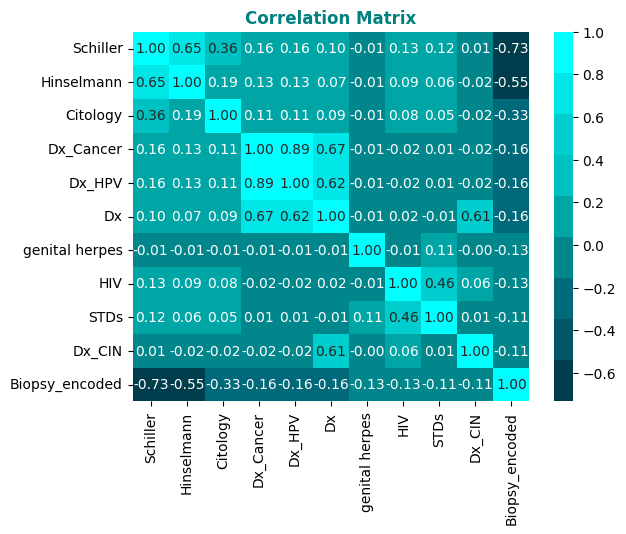

In [ ]:
teal_palette = ['#003D4D', '#005566', '#00697A', '#00868B', '#00A5A5',
                '#00C1C1', '#00CDCD', '#00E5E5', '#00FFFF']

# correlation matrix
corr = new_df.corr()

# Create the heatmap
sns.heatmap(corr, annot=True, cmap=teal_palette, fmt='.2f')

plt.title('Correlation Matrix', color='teal', fontweight='bold')

plt.show()

#<font color='#008080'> <font face="roboto" size="4"> **DATA VISUALIZATION**

###<font color='#008080'> <font face="roboto" size="3.5">Top 5 features correlated with biopsy

<ipython-input-46-8f78034f0c49>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()['Biopsy_encoded'].abs().sort_values(ascending=False)


Text(0.5, 1.0, 'Top 5 Correlated Features with Biopsy')

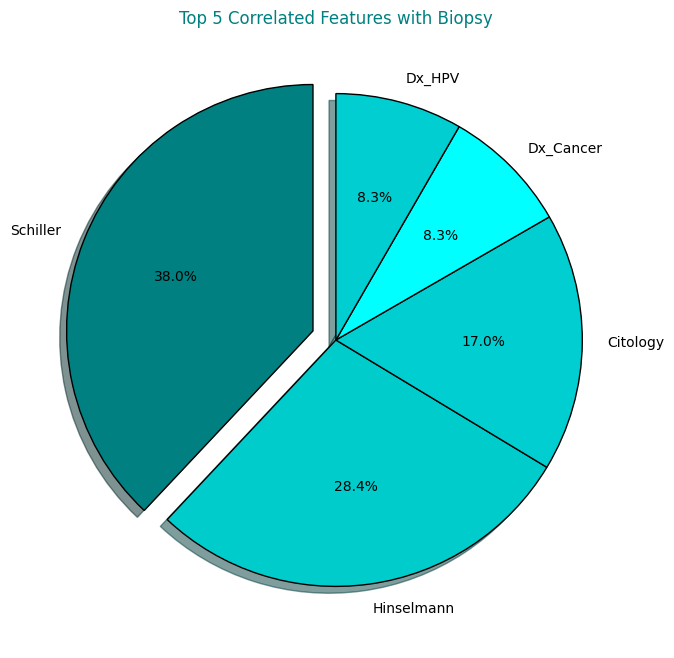

In [ ]:
teal_palette = ['#008080', '#00CCCC', '#00CED1', '#00FFFF', '#00CED1']

# Features selection (5 best correlation)
corr = df2.corr()['Biopsy_encoded'].abs().sort_values(ascending=False)

k = 5
selected_features = corr[1:k+1].index.tolist()

# Create a pie plot
explode = [0.1,0,0,0,0]
plt.figure(figsize=(8, 8))
plt.pie(corr[1:k+1], labels=selected_features, autopct='%1.1f%%',
        explode = explode,shadow = True, startangle=90,
        colors=teal_palette, wedgeprops = {'edgecolor' : 'black'})
plt.title('Top 5 Correlated Features with Biopsy',c ='teal')

###<font color='#008080'> <font face="roboto" size="4">Trend of a positive biopsy based on age group

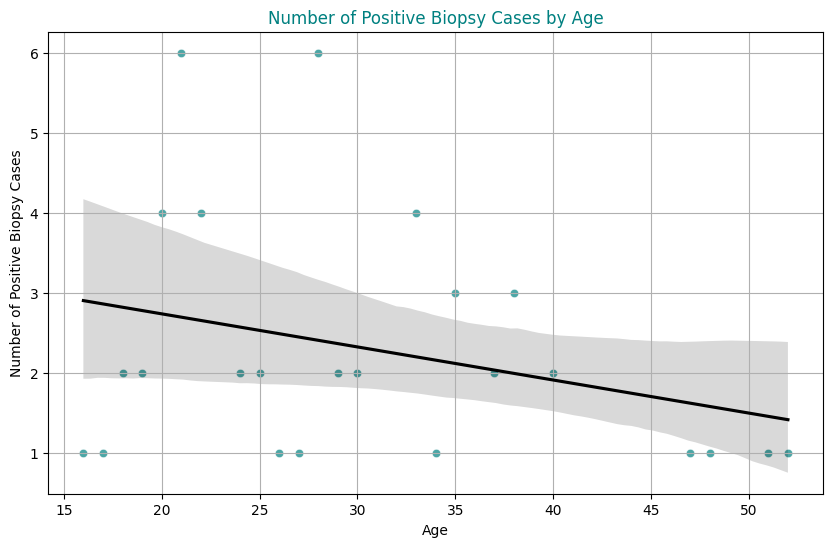

In [ ]:
# Group dataframe by Age count and positive Biopsy_encoded cases
positive_biopsy_count = df2[df2['Biopsy_encoded'] == 0].groupby('Age').size().reset_index(name='Count')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=positive_biopsy_count, x='Age', y='Count', color='teal', alpha=0.7)

# Add a trend line
sns.regplot(data=positive_biopsy_count, x='Age', y='Count', scatter=False, color='black')

plt.title('Number of Positive Biopsy Cases by Age',c = 'teal')
plt.xlabel('Age')
plt.ylabel('Number of Positive Biopsy Cases')
plt.grid(True)

###<font color='#008080'> <font face="roboto" size="4">Top 15 features correlated with biopsy

<ipython-input-48-79c2576c0ed7>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()['Biopsy_encoded'].abs().sort_values(ascending=False)


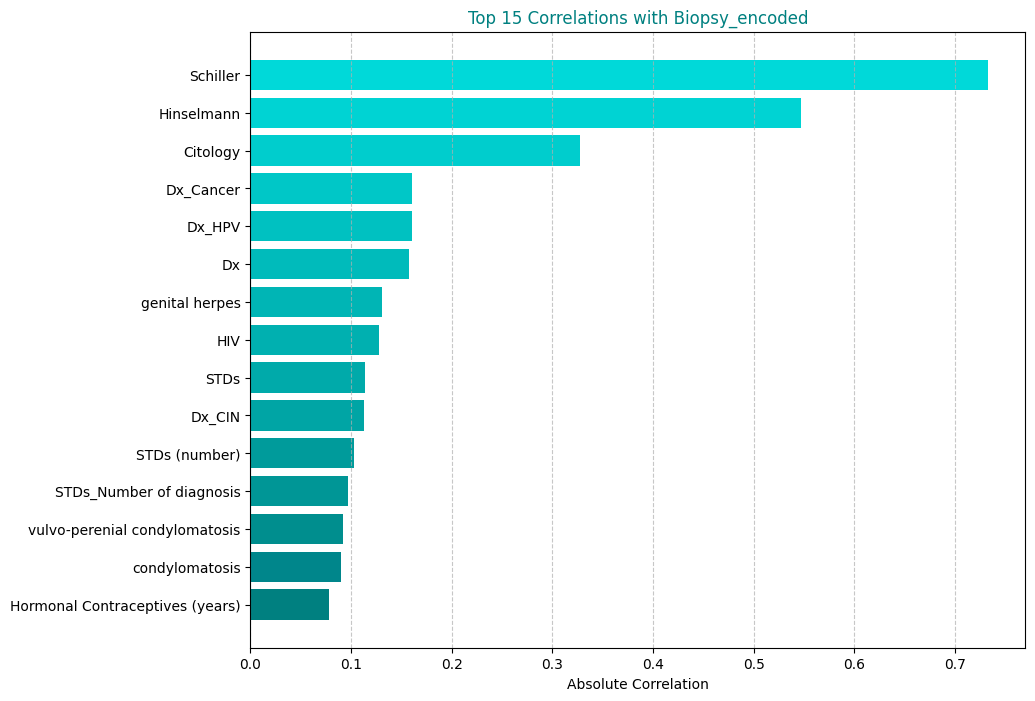

In [ ]:
teal_palette = ['#008080', '#00868B', '#008E8E', '#009696', '#009B9B', '#00A5A5',
                '#00AAAA', '#00B0B0', '#00B5B5', '#00BBBB', '#00C1C1', '#00C7C7',
                '#00CDCD', '#00D3D3', '#00D9D9']

# Features selection (15 best correlation)
corr = df2.corr()['Biopsy_encoded'].abs().sort_values(ascending=False)

k = 15
top_features = corr[1:k+1]

# Reverse the order
top_features = top_features[::-1]

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_features.index, top_features, color=teal_palette)
plt.xlabel('Absolute Correlation')
plt.title('Top 15 Correlations with Biopsy_encoded',c='teal')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

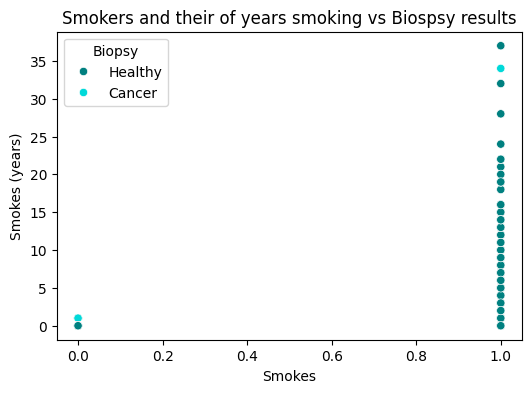

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

teal_palette= ['#008080', '#00D9D9']
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Smokes', y='Smokes (years)', hue='Biopsy', data=df2, palette=teal_palette)
plt.title('Smokers and their of years smoking vs Biospsy results')
plt.show()


<ipython-input-50-3166d2be8d28>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Smokes', y='Biopsy', data=df2, kind='bar', height=5, aspect=3,


Text(0.5, 1.0, 'Biopsy vs Number of Smokers')

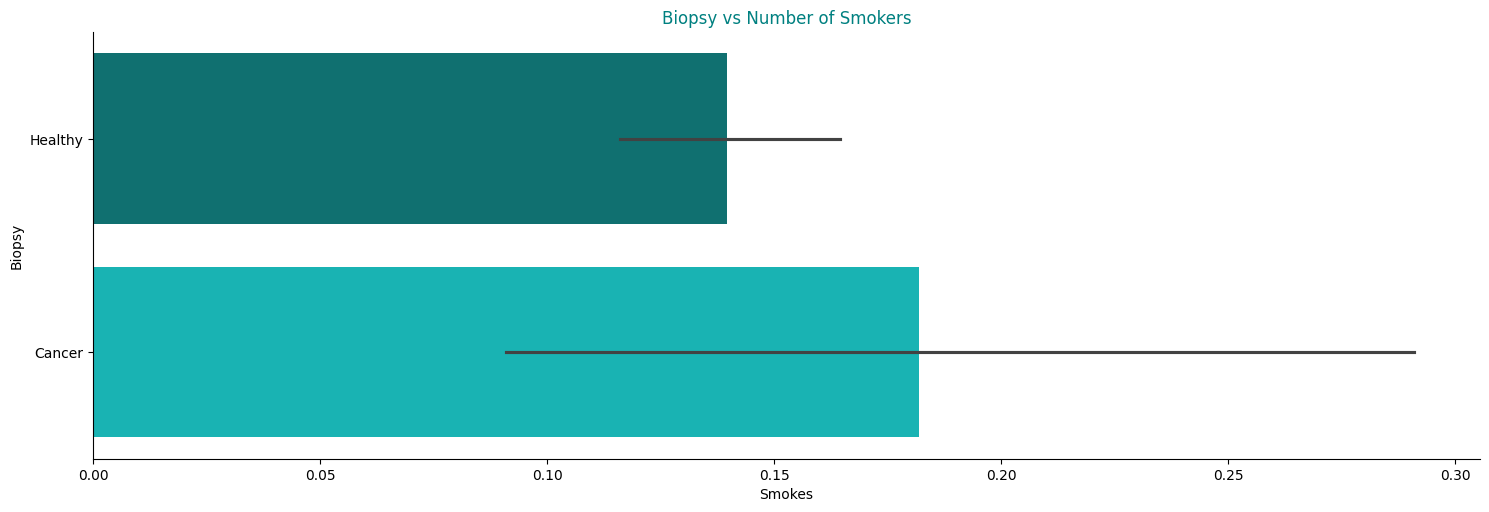

In [ ]:
# Define a teal color palette
teal_palette = ['#008080', '#00CCCC']

# Create the catplot
sns.catplot(x='Smokes', y='Biopsy', data=df2, kind='bar', height=5, aspect=3,
            palette=teal_palette)

plt.title('Biopsy vs Number of Smokers', color='teal')

###<font color='#008080'> <font face="roboto" size="4">sexual partners by biopsy

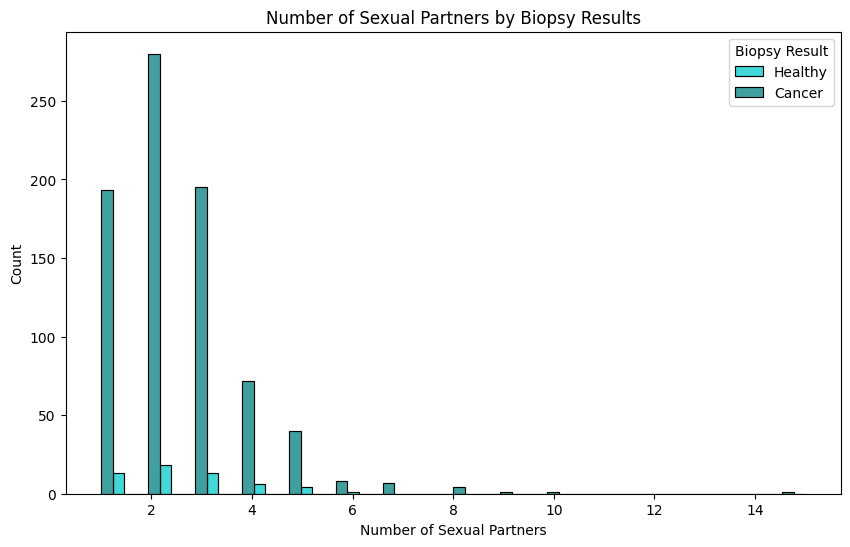

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='Number of sexual partners', hue='Biopsy', multiple='dodge', bins=30, palette=teal_palette)
plt.title('Number of Sexual Partners by Biopsy Results')
plt.xlabel('Number of Sexual Partners')
plt.ylabel('Count')
plt.legend(title='Biopsy Result', labels=['Healthy', 'Cancer'])
plt.show()

###<font color='#008080'> <font face="roboto" size="4">Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# X = df2.drop('Biopsy', 'Biopsy_encoded', axis=1)  # Assuming 'Biopsy' is the target variable
X = df2.drop(labels=['Biopsy', 'Biopsy_encoded'], axis=1)
y = df2['Biopsy_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
model = lr.fit(X_train,y_train)

###<font color='#008080'> <font face="roboto" size="4">Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix

# creating the model
model = LogisticRegression()

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9693430656934306
Testing accuracy : 0.9534883720930233
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.98      0.98      0.98       162

    accuracy                           0.95       172
   macro avg       0.79      0.79      0.79       172
weighted avg       0.95      0.95      0.95       172

[[  6   4]
 [  4 158]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model.score(X_test,y_test)

0.9534883720930233

In [ ]:
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

In [ ]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(model,X,y,cv=10)
# scores

In [ ]:
# model = RandomForestClassifier(n_estimators=50, random_state=70)
# model.fit(X_train, y_train)

In [ ]:
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

In [ ]:
# scores = cross_val_score(model,X,y,cv=10)
# scores

In [ ]:
# classification_report(y_test, y_pred)

In [ ]:
# L1 Regularization (Strict Teacher)
model_l1 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)

# Train the model (same steps as before)
model_l1.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, random_state=42)

In [ ]:
model_l1.score(X_test,y_test)

0.9476744186046512

In [ ]:
model_l2 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)  # L2 regularization
model_l2.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [ ]:
model_l2.score(X_test,y_test)

0.9476744186046512

In [ ]:
from sklearn.svm import LinearSVC
model_l1 = LinearSVC(penalty="l1", C=1.0, random_state=50, dual= False)  # Set C for L1 regularization
model_l1.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=False, penalty='l1', random_state=50)

In [ ]:
model_l1.score(X_test,y_test)

0.9418604651162791

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Define and train the KNN model with L2 regularization
model_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, weights='distance')  # L2 regularization via distance weights


In [ ]:
# Train the model
model_knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
# Evaluate model performance
y_pred = model_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9360


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv=10)
scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.94186047, 0.97674419, 0.95348837, 0.97674419, 0.93023256,
       0.95348837, 0.97674419, 0.92941176, 0.92941176, 0.97647059])

In [ ]:
import pickle
pickle.dump(model_knn, open('model.pkl', 'wb'))